In [65]:
import numpy as np
import scipy.stats as stt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from statsmodels.graphics.factorplots import interaction_plot

sb.set_style('whitegrid')
sb.set(font_scale=1.5)

## Synthetic example

We start with an example where we control the dependency from 2 predictor variables ($x1$ and $x2$) to a response variable ($y$).

For further reference on the models and , see the docs about [ordinary least square](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) estimation, as well as [patsy](https://patsy.readthedocs.io/en/latest/).

### Exercise
- Generate $y$ such that it has a linear dependency with each of the variable, test a linear model on it.
- Add a non-linear dependence to $y$ with the product 

In [57]:
# number of samples
n = 50

# exogeneous variables
x1 = stt.norm.rvs(size=n)
x2 = stt.norm.rvs(size=n)

# error
e = stt.norm.rvs(size=n)

# endogenous variable scaled by factor a
a1 = -0.5
a2 = 0.7
y = a1 * x1 + a2 * x2 + e

# build dataframe
df = pd.DataFrame(np.column_stack((x1,x2,y)), columns=['x1','x2','y'])
df.head()

x1        x2         y
0  1.951076  1.654086  0.061812
1 -0.024425  1.342077  0.091460
2  0.638307 -0.854780  1.663423
3  0.958588  1.135066  0.393107
4 -0.944212 -0.223619 -0.959402

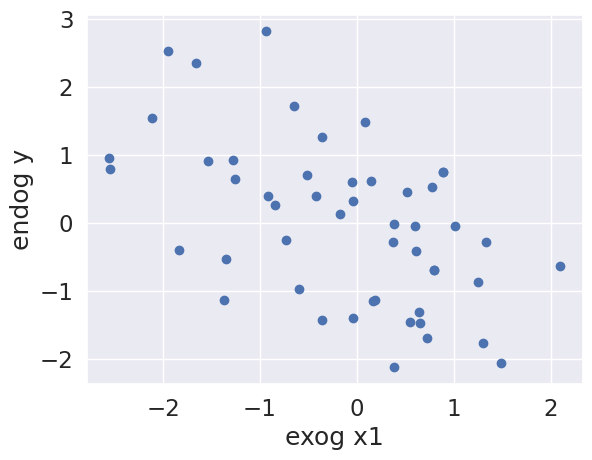

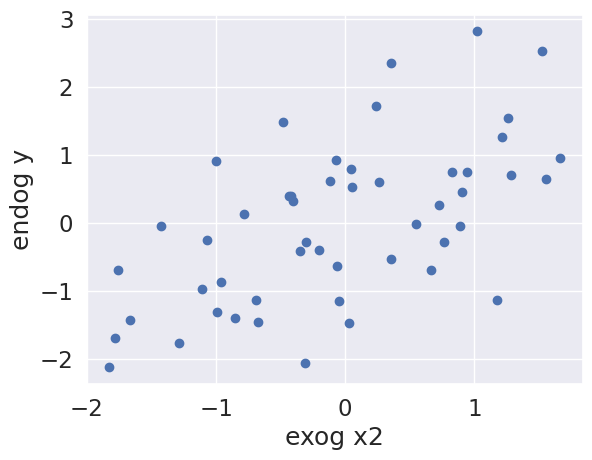

In [3]:
plt.figure()
plt.scatter(x1, y)
plt.xlabel('exog x1')
plt.ylabel('endog y')

plt.figure()
plt.scatter(x2, y)
plt.xlabel('exog x2')
plt.ylabel('endog y')

plt.show()

In [4]:
# define linear model
lm = smf.ols('y ~ x1 + x2', df)

# fit model to data
lmf = lm.fit()

# summary
print(lmf.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     22.01
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.80e-07
Time:                        00:36:28   Log-Likelihood:                -62.306
No. Observations:                  50   AIC:                             130.6
Df Residuals:                      47   BIC:                             136.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0413      0.125     -0.332      0.7

The construction of the model relies on the design matrix created by `patsy.dmatrix`.

In [5]:
y_aff, X_aff = dmatrices('y ~ x1 + x2', data=df, return_type='dataframe')
X_aff.head()

Intercept        x1        x2
0        1.0 -0.598903 -1.107940
1        1.0  1.484895 -0.308404
2        1.0 -1.279121 -0.071924
3        1.0  0.796557 -1.757192
4        1.0  0.772527  0.049753

## Interactions between predictors

Now we change the model to incorporate a non-linear interaction between $x1$ and $x2$.

In [6]:
# coefficient for the interaction, which is simply a second-order polynomial in x1, x2
a12 = 0.4
y2 = a1 * x1 + a2 * x2 + a12 * x1 * x2 + e

# build dataframe
df['y2'] = y2
df.head()

x1        x2         y        y2
0 -0.598903 -1.107940 -0.983083 -0.717664
1  1.484895 -0.308404 -2.069647 -2.252826
2 -1.279121 -0.071924  0.927597  0.964397
3  0.796557 -1.757192 -0.702349 -1.262231
4  0.772527  0.049753  0.529516  0.544891

In [7]:
y_aff, X_aff = dmatrices('y2 ~ x1 * x2', data=df, return_type='dataframe')
X_aff.head()

Intercept        x1        x2     x1:x2
0        1.0 -0.598903 -1.107940  0.663548
1        1.0  1.484895 -0.308404 -0.457947
2        1.0 -1.279121 -0.071924  0.092000
3        1.0  0.796557 -1.757192 -1.399704
4        1.0  0.772527  0.049753  0.038436

In [8]:
# define linear model
lm2 = smf.ols('y2 ~ x1 * x2', df)

# fit model to data
lmf2 = lm2.fit()

# summary
print(lmf2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     14.01
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.28e-06
Time:                        00:36:41   Log-Likelihood:                -62.280
No. Observations:                  50   AIC:                             132.6
Df Residuals:                      46   BIC:                             140.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0335      0.131     -0.256      0.7

This model accurately captures the coefficients used to generate $y2$.

In [9]:
# model without interaction
lm = smf.ols('y2 ~ x1 + x2', df)

# fit model to data
lmf = lm.fit()

# summary
print(lmf.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     12.48
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           4.48e-05
Time:                        00:36:52   Log-Likelihood:                -67.852
No. Observations:                  50   AIC:                             141.7
Df Residuals:                      47   BIC:                             147.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1561      0.139     -1.121      0.2

Note that correctly estimating the interaction requires including the linear dependencies.

In [10]:
# model with only the interaction
lm3 = smf.ols('y2 ~ x1 : x2', df)

# fit model to data
lmf3 = lm3.fit()

# summary
print(lmf3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.257
Date:                Thu, 06 Jul 2023   Prob (F-statistic):              0.268
Time:                        00:37:28   Log-Likelihood:                -77.858
No. Observations:                  50   AIC:                             159.7
Df Residuals:                      48   BIC:                             163.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0803      0.173     -0.465      0.6

### EXERCISE
- Redo the fit of $y$ by the model with interactions (`lm2`)
- with the below data, check relationships and interactions between the cognitive scores.
- Adapt the synthetic model to the data and compare the perf with the model fitted on data.

Dataset taken from R dataset repository ([link](https://github.com/vincentarelbundock/Rdatasets/)), use e.g.
`df = sm.datasets.get_rdataset("NeuroCog", "heplots").data`

In [12]:
# load NeuroCog data 
df = pd.read_csv('NeuroCog_dataset.csv', sep=',')

df.head()

Unnamed: 0             Dx  Speed  Attention  Memory  Verbal  Visual   
0          14  Schizophrenia     19          9      19      33      24  \
1          15  Schizophrenia      8         25      15      28      24   
2          16  Schizophrenia     14         23      15      20      13   
3          17  Schizophrenia      7         18      14      34      16   
4          18  Schizophrenia     21          9      35      28      29   

   ProbSolv  SocialCog  Age     Sex  
0        39         28   44  Female  
1        40         37   26    Male  
2        32         24   55  Female  
3        31         36   53    Male  
4        45         28   51    Male

## 